In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install rasterio

     |████████████████████████████████| 19.1MB 162kB/s 


In [3]:
import rasterio
import numpy as np
import tifffile as tiff
import matplotlib
import matplotlib.pyplot as plt

In [4]:
import xarray as xr

In [5]:
#Path of satellite images
#B4: Red B8: NIR
path16_R = "/content/drive/MyDrive/Image/dunhuang_20160801_20160831_10m_B4.tif"
path16_NIR = "/content/drive/MyDrive/Image/dunhuang_20160801_20160831_B8_10m.tif"

path20_R = "/content/drive/MyDrive/Image/dunhuang_20200801_20200831_10m_B4.tif"
path20_NIR = "/content/drive/MyDrive/Image/dunhuang_20200801_20200831_B8_10m.tif"

In [6]:
tmpImg16_R = xr.open_rasterio(path16_R)
temImg16_NIR = xr.open_rasterio(path16_NIR)

temImg20_R = xr.open_rasterio(path20_R)
temImg20_NIR = xr.open_rasterio(path20_NIR)

In [7]:
print(tmpImg16_R.shape)
print(temImg16_NIR)
print(temImg20_R)
print(temImg20_NIR)

(1, 5014, 6124)
<xarray.DataArray (band: 1, y: 5014, x: 6124)>
[30705736 values with dtype=float32]
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 40.45 40.45 40.45 40.45 40.45 ... 40.0 40.0 40.0 40.0
  * x        (x) float64 94.4 94.4 94.4 94.4 94.4 ... 94.95 94.95 94.95 94.95
Attributes:
    transform:      (8.983152841195215e-05, 0.0, 94.39991078934197, 0.0, -8.9...
    crs:            +init=epsg:4326
    res:            (8.983152841195215e-05, 8.983152841195215e-05)
    is_tiled:       1
    nodatavals:     (nan,)
    scales:         (1.0,)
    offsets:        (0.0,)
    descriptions:   ('B8',)
    AREA_OR_POINT:  Area
<xarray.DataArray (band: 1, y: 5014, x: 6124)>
[30705736 values with dtype=float32]
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 40.45 40.45 40.45 40.45 40.45 ... 40.0 40.0 40.0 40.0
  * x        (x) float64 94.4 94.4 94.4 94.4 94.4 ... 94.95 94.95 94.95 94.95
Attributes:
    transform:      (8.983152841195215e-05, 0.0, 94.3999

### Calculate NDVI

In [8]:
def calculate_NDVI(nir, red):
    """
    Calculate the NDVI from the NIR and red landsat bands
    """
    
    # Convert to floats
    nir = nir.astype(float)
    red = red.astype(float)
    
    # Where the check is True, return the NDVI, else return NaN
    ndvi = (nir - red ) / ( nir + red )
    return ndvi 

In [9]:
NDVI_16 = calculate_NDVI(temImg16_NIR, tmpImg16_R)

In [10]:
NDVI_16.shape

(1, 5014, 6124)

In [11]:
NDVI16_p = NDVI_16.T

In [12]:
NDVI16_p.shape

(6124, 5014, 1)

In [13]:
NDVI16_p.shape

(6124, 5014, 1)

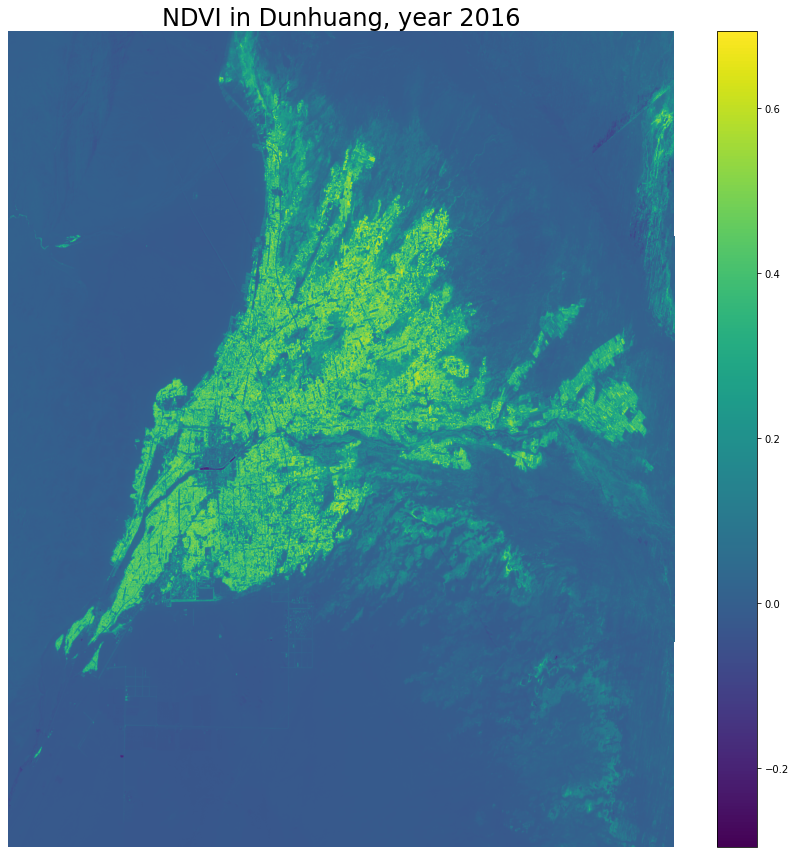

In [19]:
fig, ax = plt.subplots(figsize=(15,15))

# Plot NDVI
img = ax.imshow(NDVI16_p.squeeze())
plt.colorbar(img,ax=ax)
ax.set_axis_off()
ax.set_title("NDVI in Dunhuang, year 2016", fontsize=24);
plt.gca().invert_yaxis();
plt.gca().invert_xaxis();
plt.show();

In [20]:
NDVI_20 = calculate_NDVI(temImg20_NIR, temImg20_R)

In [21]:
NDVI_20.shape

(1, 5014, 6124)

In [22]:
NDVI20_p = NDVI_20.T

In [23]:
NDVI20_p.shape

(6124, 5014, 1)

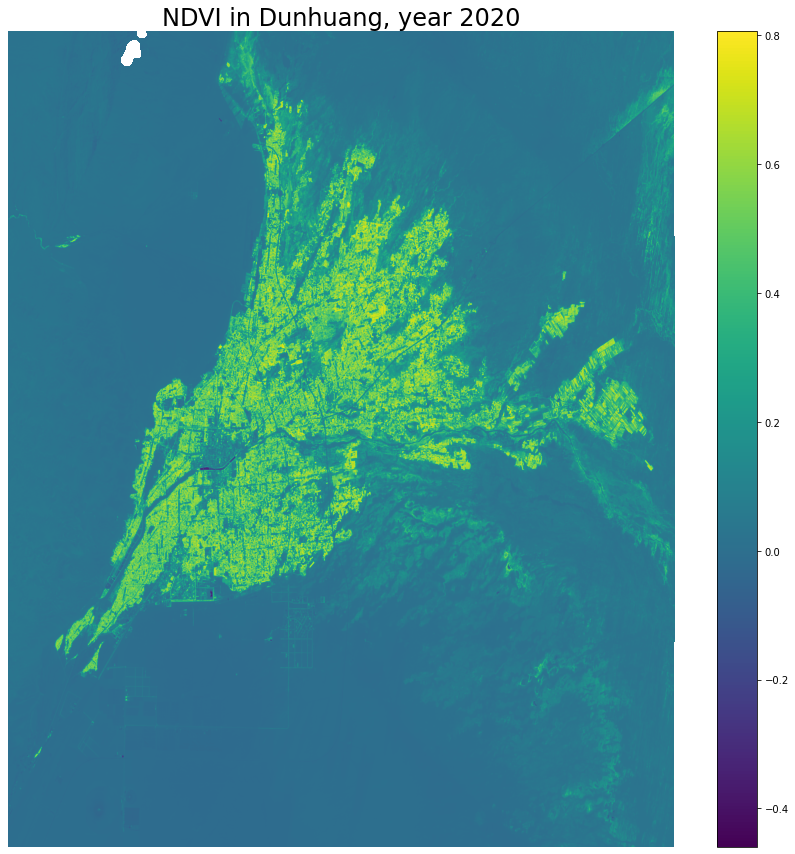

In [24]:
fig, ax = plt.subplots(figsize=(15,15))

# Plot NDVI
img = ax.imshow(NDVI20_p.squeeze())
plt.colorbar(img,ax=ax)
ax.set_axis_off()
ax.set_title("NDVI in Dunhuang, year 2020", fontsize=24);
plt.gca().invert_yaxis();
plt.gca().invert_xaxis();
plt.show();

In [25]:
#Difference
Diff_NDVI = NDVI20_p - NDVI16_p

In [26]:
Diff_NDVI.shape

(6124, 5014, 1)

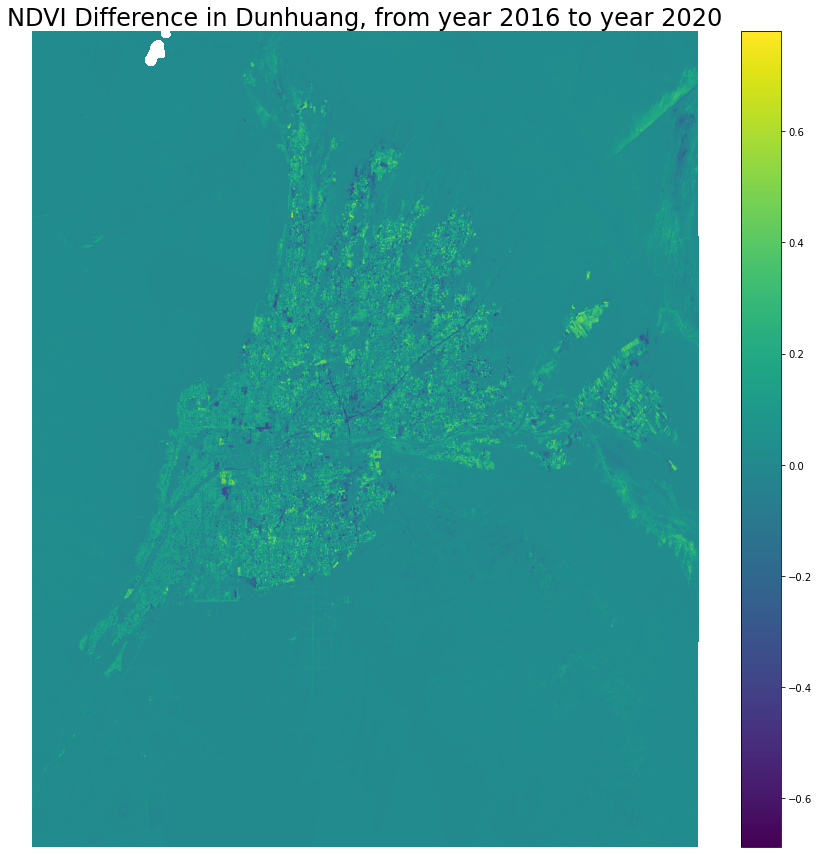

In [30]:
fig, ax = plt.subplots(figsize=(15,15))

# Plot NDVI
img = ax.imshow(Diff_NDVI.squeeze())
plt.colorbar(img,ax=ax)
ax.set_axis_off()
ax.set_title("NDVI Difference in Dunhuang, from year 2016 to year 2020", fontsize=24);
plt.gca().invert_yaxis();
plt.gca().invert_xaxis();
plt.show();